In [50]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import boxcox
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import statsmodels.tsa.api as smt
from pylab import rcParams
%matplotlib inline

In [51]:
#Functions to test stationarity, plot graphics
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    
    test_stationarity(y)
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
        #plt.show()
    return


def plt_ts(title, data, x, y, x_label, y_label, text=False, lam=None):

    fig = px.line(data, x=data[x], y=data[y], labels={x: x_label, y: y_label})

    fig.update_layout(template="simple_white", font=dict(size=14),
                      title_text=title, width=650,
                      title_x=0.5, height=400)
    fig.show()

In [52]:
#Importing time series

sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

## Sales of company time series

In [53]:
plt_ts("Sales of company", sales_of_company_x, x="Month",y="Count",x_label="date",y_label="sales")

In [54]:
#Box-cox - finding optimal lambda

df = sales_of_company_x
df['box_cox'],lam = boxcox(df['Count'])
df.drop(columns={'Count'},inplace=True)

#plt_ts("Sales of company", df, x="Month",y="Count",x_label="date",y_label="sales", text=True, lam=lam)
plt_ts(f"Sales of company with Box-Cox lambda {lam:.3f}", df, x="Month",y="box_cox",x_label="date",y_label="sales")


In [55]:
df_diff = pd.DataFrame(np.diff(df.box_cox)).reset_index()
df_diff.columns = ['point','ts_diff']
plt_ts(f"Sales of company - differentiated TS", df_diff, x="point",y="ts_diff",x_label="date",y_label="sales")

Results of Dickey-Fuller Test:
Test Statistic                 -3.284204
p-value                         0.015599
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/home/stan/deeplearn/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



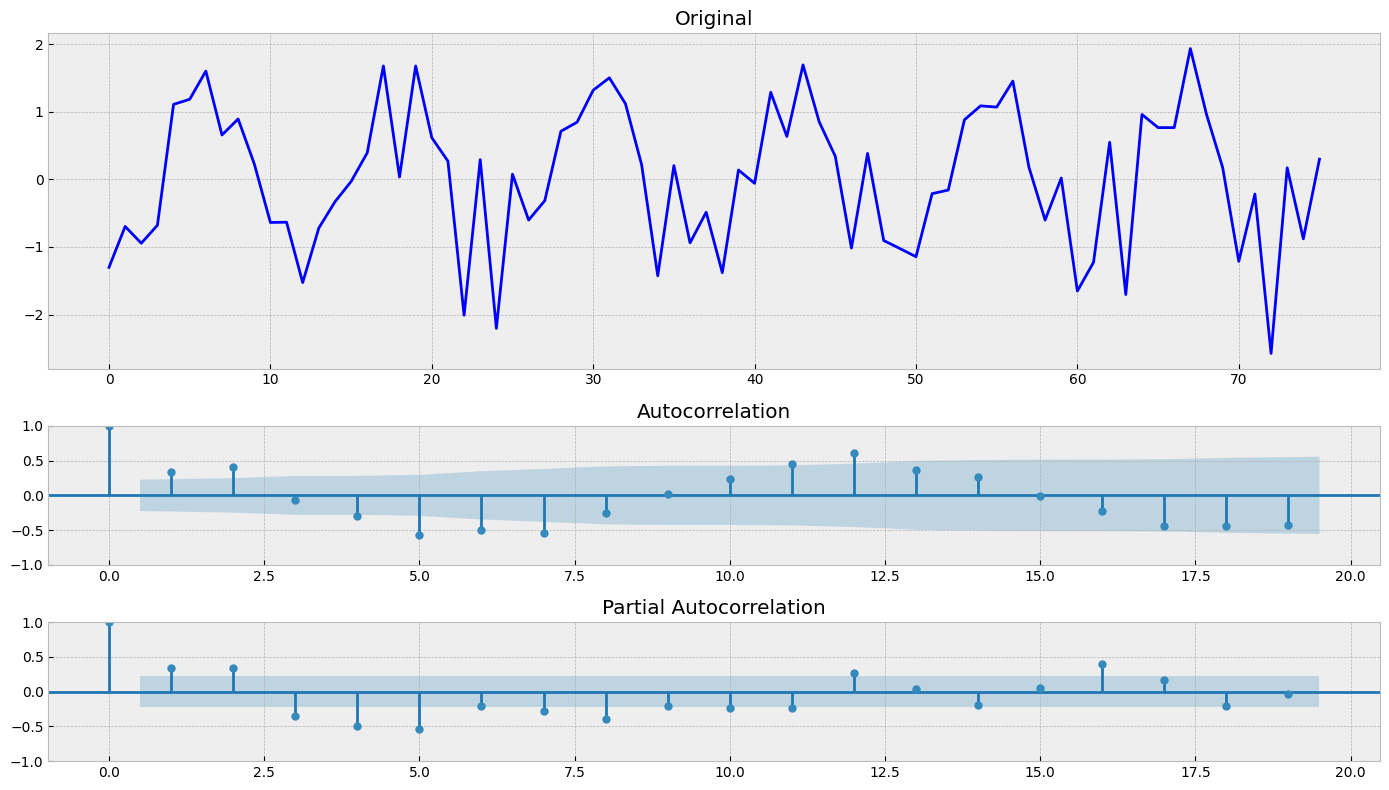

In [56]:
tsplot(df_diff.ts_diff)

### Time series are stationary - p-value < 0.05

## Robberies in Boston time series

In [57]:
plt_ts("Robberies in Boston", robberies_in_boston, x="Month",y="Count",x_label="date",y_label="# of robberies")

In [58]:
#Box-cox - finding optimal lambda
df = robberies_in_boston
df['box_cox'],lam = boxcox(df['Count'])
df.drop(columns={'Count'},inplace=True)

plt_ts(f"Robberies in Boston with Box-Cox lambda {lam:.3f}", df, x="Month",y="box_cox",x_label="date",y_label="# of robberies")


In [59]:
df_diff = pd.DataFrame(np.diff(df.box_cox)).reset_index()
df_diff.columns = ['point','ts_diff']
plt_ts(f"Robberies in Boston - differentiated TS", df_diff, x="point",y="ts_diff",x_label="date",y_label="# of robberies")

Results of Dickey-Fuller Test:
Test Statistic                -5.862061e+00
p-value                        3.392206e-07
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


/home/stan/deeplearn/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



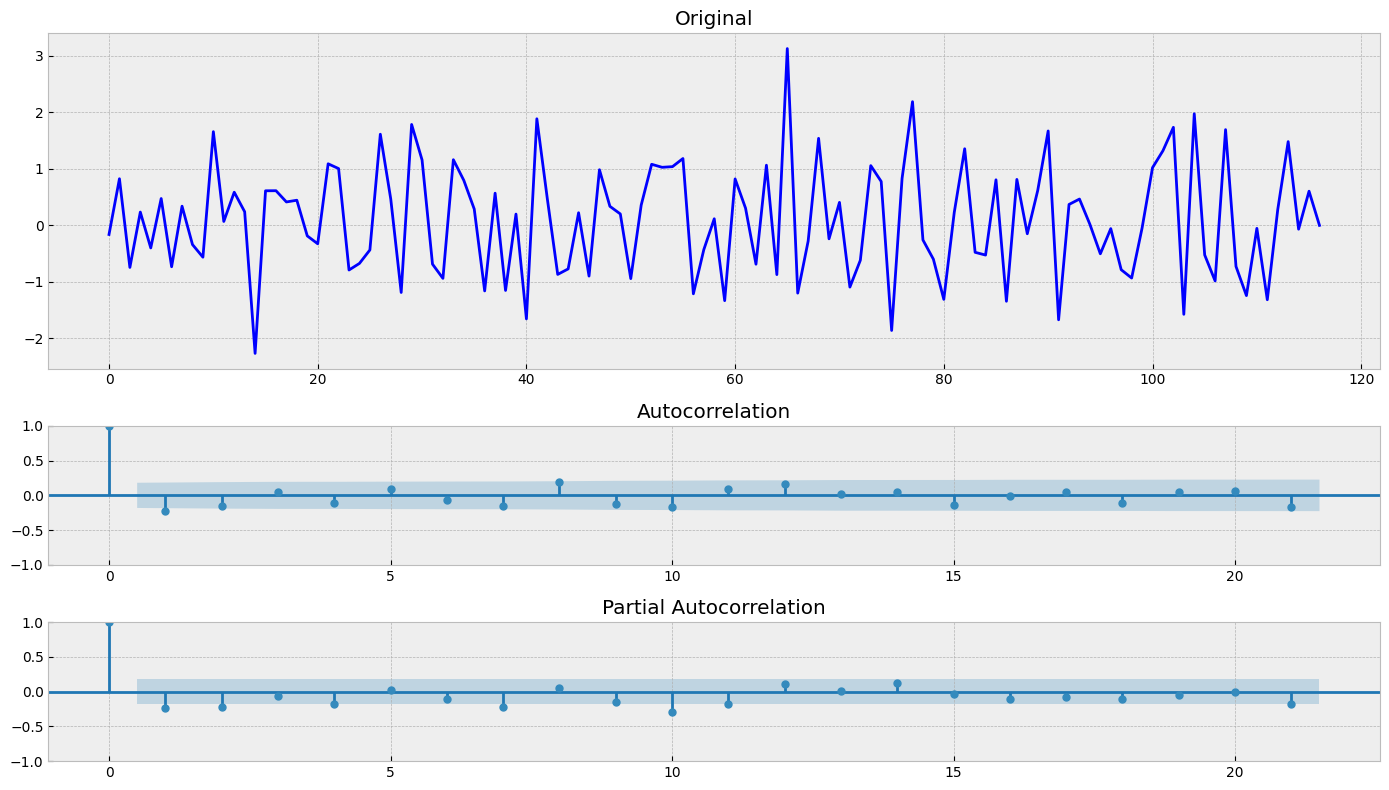

In [60]:
tsplot(df_diff.ts_diff)

### Time series are stationary - p-value < 0.05

## Airlines passangers time series

In [61]:
plt_ts("Airlines passengers", airlines_passengers, x="Month",y="Count",x_label="date",y_label="# of passengers")

In [62]:
#Box-cox - finding optimal lambda
df = airlines_passengers
df['box_cox'],lam = boxcox(df['Count'])
df.drop(columns={'Count'},inplace=True)

plt_ts(f"Airlines passengers with Box-Cox lambda {lam:.3f}", df, x="Month",y="box_cox",x_label="date",y_label="# of passengers")


In [63]:
df_diff = pd.DataFrame(np.diff(df.box_cox)).reset_index()
df_diff.columns = ['point','ts_diff']
plt_ts(f"Airlines passengers - differentiated TS", df_diff, x="point",y="ts_diff",x_label="date",y_label="# of passengers")

Results of Dickey-Fuller Test:
Test Statistic                  -2.871708
p-value                          0.048738
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


/home/stan/deeplearn/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



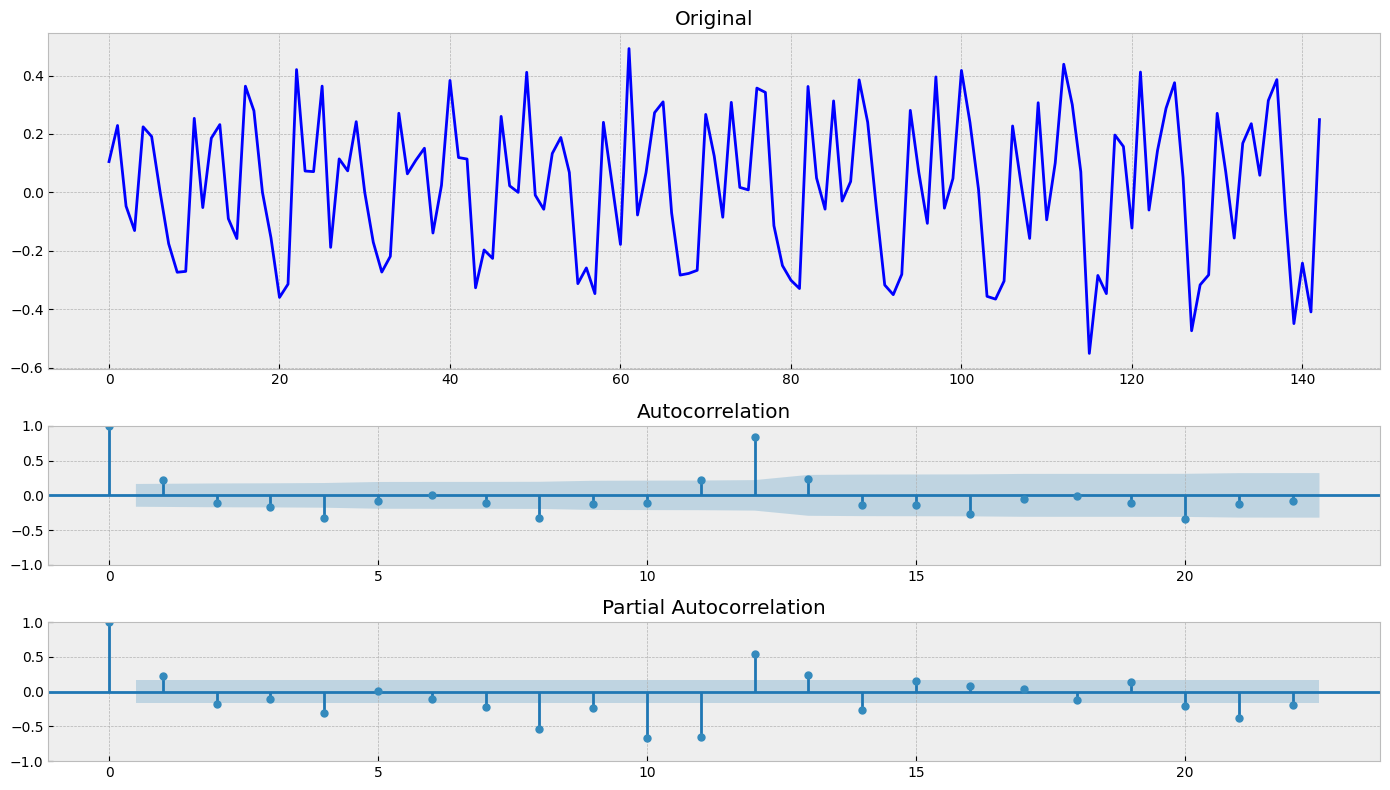

In [64]:
tsplot(df_diff.ts_diff)

### Time series are stationary - p-value < 0.05

## Mean monthly temperature time series

In [65]:
plt_ts("Mean monthly temperatures", mean_monthly_temp, x="Month",y="Deg",x_label="date",y_label="Degrees")

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


/home/stan/deeplearn/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



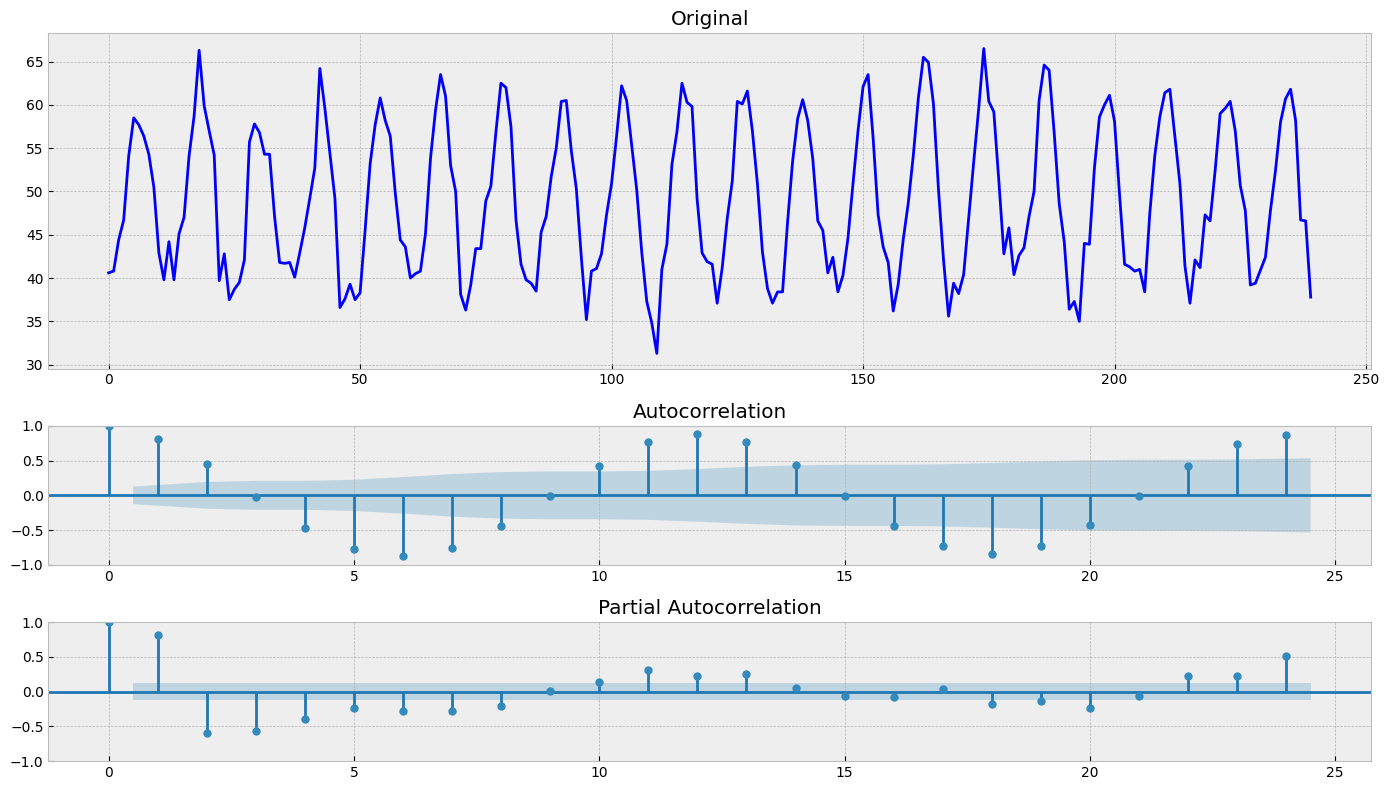

In [66]:
tsplot(mean_monthly_temp.Deg)

### No need to make transformations - series are already stationary - p < 0.05

## Dow Jones closing time series

In [67]:
plt_ts("Dow Jones closing", dowjones_closing, x="Week",y="Close",x_label="week",y_label="Close")

In [69]:
#Box-cox - finding optimal lambda
df = dowjones_closing
df['box_cox'],lam = boxcox(df['Close'])
df.drop(columns={'Close'},inplace=True)

plt_ts(f"Dow Jones closing with Box-Cox lambda {lam:.3f}", df, x="Week",y="box_cox",x_label="week",y_label="Close")

In [71]:
df_diff = pd.DataFrame(np.diff(df.box_cox)).reset_index()
df_diff.columns = ['point','ts_diff']
plt_ts("Dow Jones closing - differentiated TS", df_diff, x="point",y="ts_diff",x_label="week",y_label="Close")

Results of Dickey-Fuller Test:
Test Statistic                -1.302750e+01
p-value                        2.382691e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


/home/stan/deeplearn/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



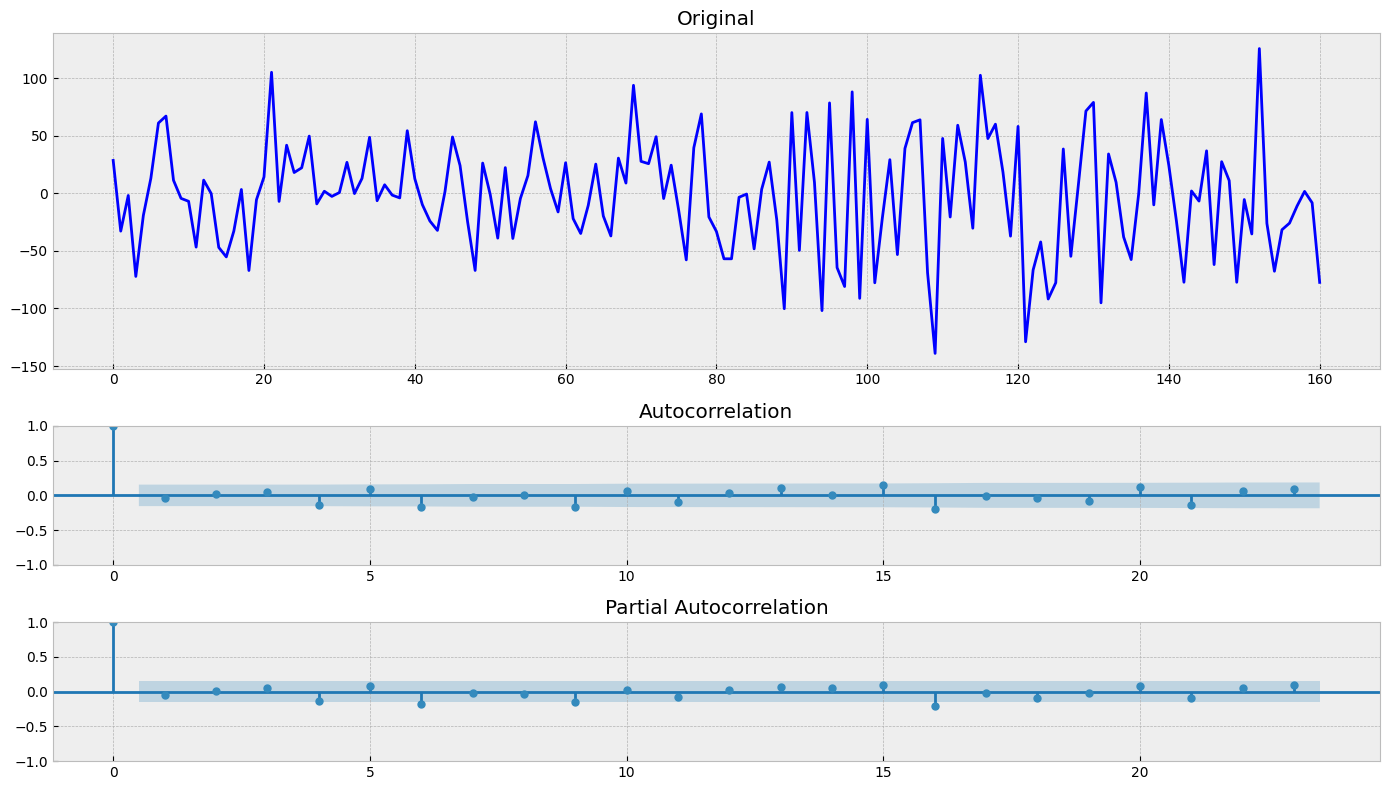

In [72]:
tsplot(df_diff.ts_diff)

### Time series are stationary - p-value < 0.05

## Female births time series

In [78]:
plt_ts("Female birhts", female_births, x="Date",y="Count",x_label="date",y_label="# births")

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


/home/stan/deeplearn/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



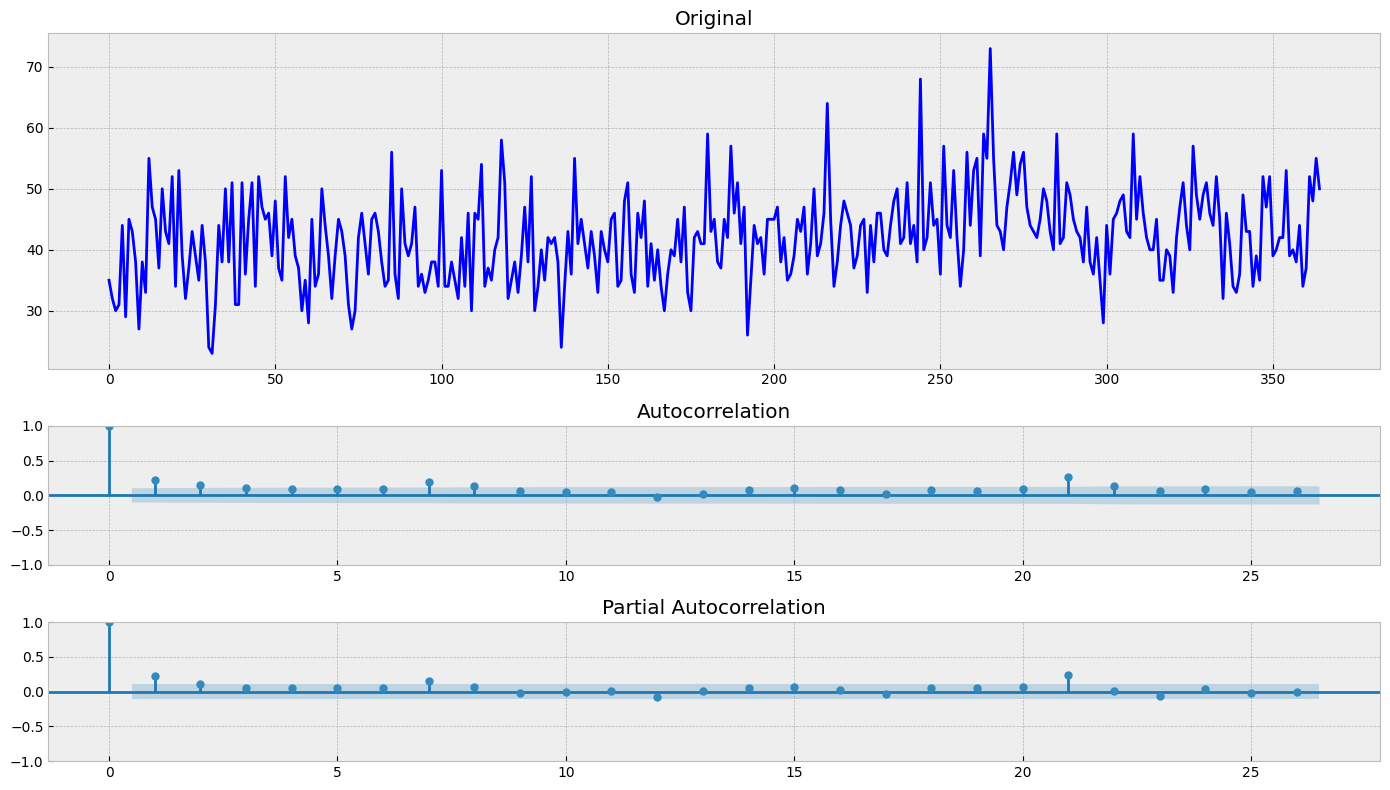

In [79]:
tsplot(female_births.Count)

### No need to make transformations - series are already stationary - p < 0.05